1. Загрузить файл HR.csv в pandas dataframe.
2. Рассчитайть основные статистики для переменных: среднее, медиана, мода, мин/макс, среднее отклонение.


In [2]:
import pandas as pd
df = pd.read_csv('HR.csv')
# Выбор столбцов без "department" и "salary"
selected_columns = df.drop(['department', 'salary'], axis=1)
# Рассчет основные статистики для оставшихся переменных
mean_values = selected_columns.mean()
median_values = selected_columns.median()
mode_values = selected_columns.mode().iloc[0]
min_values = selected_columns.min()
max_values = selected_columns.max()
std_deviation = selected_columns.std()

# Вывод результатов
statistics = pd.DataFrame({
    'Среднее': mean_values,
    'Медиана': median_values,
    'Мода': mode_values,
    'Минимум': min_values,
    'Максимум': max_values,
    'Среднее отклонение': std_deviation
})

print(statistics)
# Рассчет моды для переменной "department" и "salary"
mode_department = df['department'].mode().iloc[0]
mode_salary = df['salary'].mode().iloc[0]

# Вывод результатов
mode_values = pd.Series({
    'Мода (department)': mode_department,
    'Мода (salary)': mode_salary
})

print(mode_values)

                          Среднее  Медиана    Мода  Минимум  Максимум  \
satisfaction_level       0.612834     0.64    0.10     0.09       1.0   
last_evaluation          0.716102     0.72    0.55     0.36       1.0   
number_project           3.803054     4.00    4.00     2.00       7.0   
average_montly_hours   201.050337   200.00  135.00    96.00     310.0   
time_spend_company       3.498233     3.00    3.00     2.00      10.0   
Work_accident            0.144610     0.00    0.00     0.00       1.0   
left                     0.238083     0.00    0.00     0.00       1.0   
promotion_last_5years    0.021268     0.00    0.00     0.00       1.0   

                       Среднее отклонение  
satisfaction_level               0.248631  
last_evaluation                  0.171169  
number_project                   1.232592  
average_montly_hours            49.943099  
time_spend_company               1.460136  
Work_accident                    0.351719  
left                             0

3. Рассчитайть и визуализировать корреляционную матрицу для количественных переменных. Определить две самые скоррелированные и две наименее скоррелированные переменные.

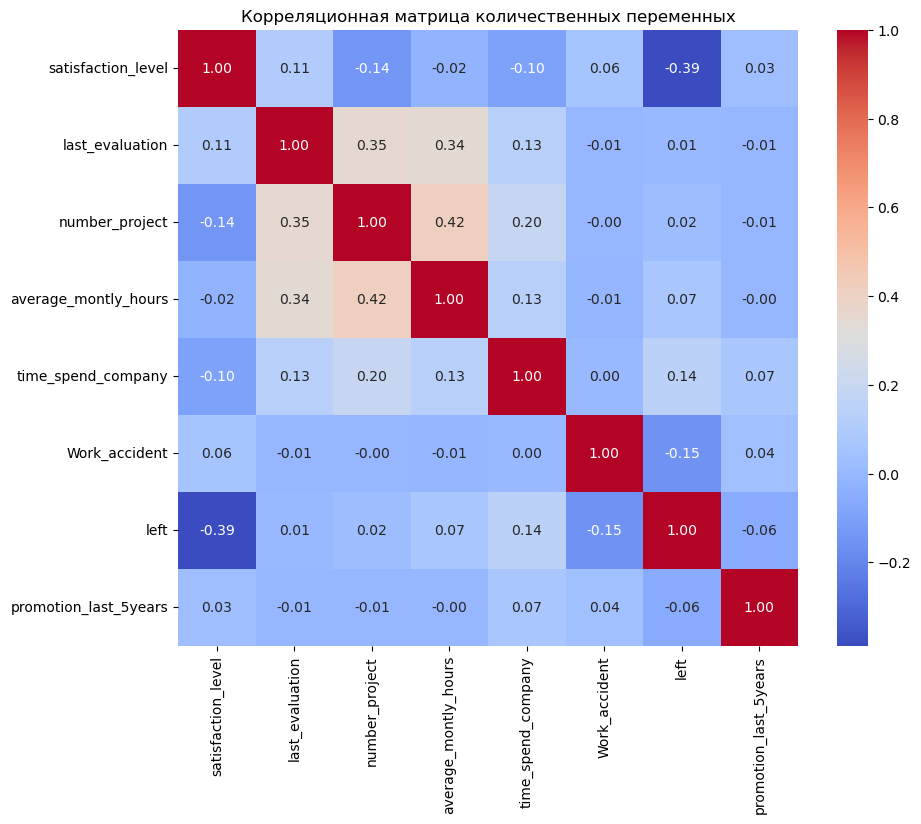

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Выбор только количественных переменных
quantitative_vars = df[['satisfaction_level', 'last_evaluation', 'number_project',
                        'average_montly_hours', 'time_spend_company',
                        'Work_accident', 'left', 'promotion_last_5years']]

# Рассчет корреляционной матрицы
correlation_matrix = quantitative_vars.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица количественных переменных')
plt.show()


In [24]:
import numpy as np
# Нахождение силы корреляции
correlation_matrix = quantitative_vars.corr().abs()

# Удаление главной диагонали
np.fill_diagonal(correlation_matrix.values, np.nan)

# Нахождение пар с наибольшей и наименьшей корреляцией
most_correlated = correlation_matrix.stack().nlargest(4).index
least_correlated = correlation_matrix.stack().nsmallest(4).index

print(f"Наиболее скоррелированные переменные (по модулю):")
for pair in most_correlated:
    var1, var2 = pair
    correlation_value = correlation_matrix.loc[var1, var2]
    print(f"{var1} и {var2}, Корреляция: {correlation_value:.4f}")

print(f"\nНаименее скоррелированные переменные (по модулю):")
for pair in least_correlated:
    var1, var2 = pair
    correlation_value = correlation_matrix.loc[var1, var2]
    print(f"{var1} и {var2}, Корреляция: {correlation_value:.4f}")


Наиболее скоррелированные переменные (по модулю):
number_project и average_montly_hours, Корреляция: 0.4172
average_montly_hours и number_project, Корреляция: 0.4172
satisfaction_level и left, Корреляция: 0.3884
left и satisfaction_level, Корреляция: 0.3884

Наименее скоррелированные переменные (по модулю):
time_spend_company и Work_accident, Корреляция: 0.0021
Work_accident и time_spend_company, Корреляция: 0.0021
average_montly_hours и promotion_last_5years, Корреляция: 0.0035
promotion_last_5years и average_montly_hours, Корреляция: 0.0035


Переменные 'number_project' и 'average_montly_hours' имеют наивысшую положительную корреляцию (0.4172),а переменные 'satisfaction_level' и 'left' имеют наивысшую отрицательную корреляцию (-0.3884). Переменные 'time_spend_company' и 'Work_accident' имеют наименьшую положительную корреляцию (0.00212).Переменные 'average_montly_hours' и 'promotion_last_5years' также имеют низкую положительную корреляцию (0.0035).

4. Рассчитать, сколько сотрудников работает в каждом департаменте.

In [4]:
# Рассчет количества сотрудников в каждом департаменте
employee_count_by_department = df['department'].value_counts()

print(employee_count_by_department)


department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: count, dtype: int64


Рассчет количества сотрудников в каждом департаменте без учета уволившихся сотрудников

In [5]:
# Фильтр DataFrame (оставляем только сотрудников, которые не уволились (left = 0))
active_employees = df[df['left'] == 0]

active_employee_count_by_department = active_employees['department'].value_counts()

print(active_employee_count_by_department)

department
sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: count, dtype: int64


5. Показать распределение сотрудников по зарплатам.
6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

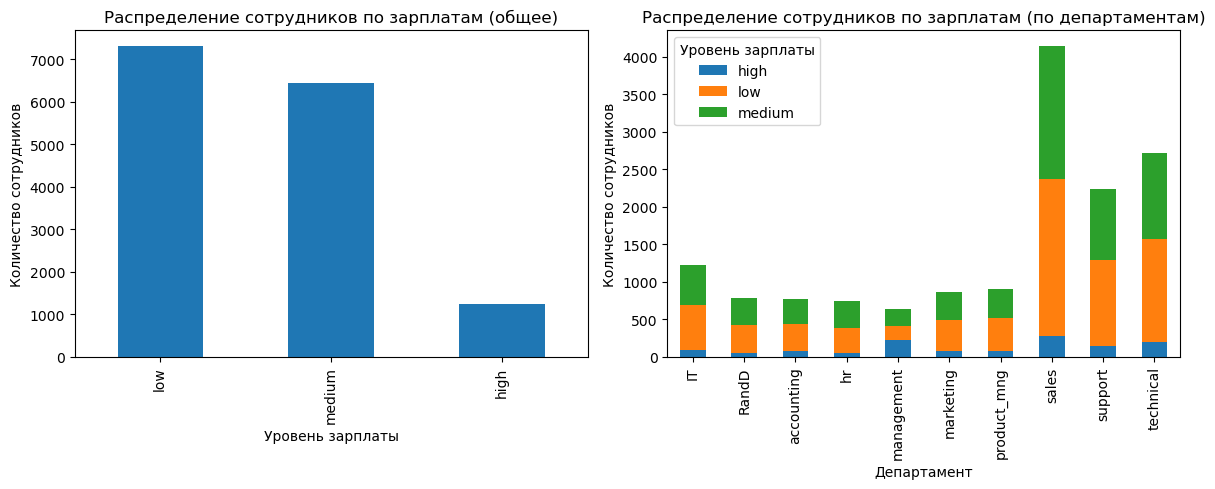

In [6]:
import matplotlib.pyplot as plt

# Распределение сотрудников по зарплатам 
salary_distribution = df['salary'].value_counts()

# Создание subplot 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Диаграмма общего распределения
salary_distribution.plot(kind='bar', ax=axes[0])
axes[0].set_title('Распределение сотрудников по зарплатам (общее)')
axes[0].set_xlabel('Уровень зарплаты')
axes[0].set_ylabel('Количество сотрудников')

# Диаграмма для распределения по департаментам
department_salary_distribution = df.groupby(['department', 'salary']).size().unstack(fill_value=0)
department_salary_distribution.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Распределение сотрудников по зарплатам (по департаментам)')
axes[1].set_xlabel('Департамент')
axes[1].set_ylabel('Количество сотрудников')
axes[1].legend(title='Уровень зарплаты')

plt.tight_layout()
plt.show()


7. Проверьте гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

Нулевая гипотеза (H0): Среднее количество часов на работе сотрудников с высоким и низким окладом одинаково.
Альтернативная гипотеза (H1): Среднее количество часов на работе сотрудников с высоким окладом отличается от среднего количества часов сотрудников с низким окладом.

In [11]:
from scipy import stats
# Выделение данных для сотрудников с высоким и низким окладом
high_salary_hours = df[df['salary'] == 'high']['average_montly_hours']
low_salary_hours = df[df['salary'] == 'low']['average_montly_hours']

# t-тест для сравнения средних значений
t_statistic, p_value = stats.ttest_ind(high_salary_hours, low_salary_hours)

alpha = 0.05

print(f"Значение t-статистики: {t_statistic}")
print(f"Значение p-уровня значимости: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: Сотрудники с высоким окладом проводят на работе больше времени.")
else:
    print("Не отвергаем нулевую гипотезу: Нет статистически значимых различий во времени на работе между сотрудниками с высоким и низким окладом.")

Значение t-статистики: -0.7288680398062308
Значение p-уровня значимости: 0.4661023478267259
Не отвергаем нулевую гипотезу: Нет статистически значимых различий во времени на работе между сотрудниками с высоким и низким окладом.


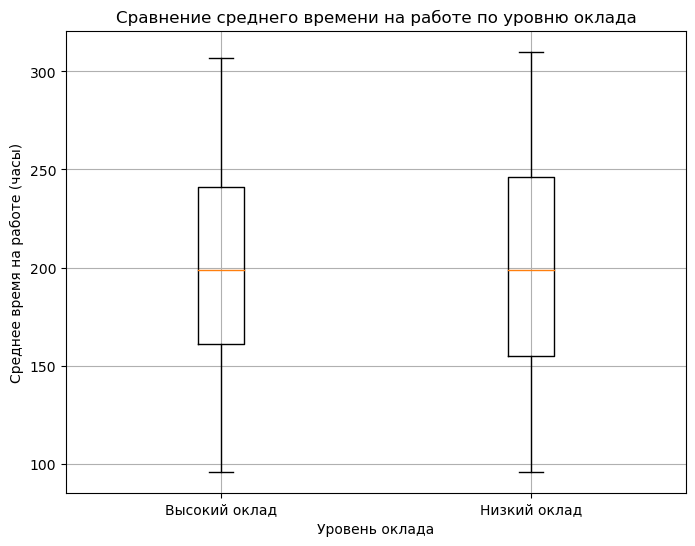

In [8]:
plt.figure(figsize=(8, 6))
plt.boxplot([high_salary_hours, low_salary_hours], labels=['Высокий оклад', 'Низкий оклад'])
plt.title('Сравнение среднего времени на работе по уровню оклада')
plt.xlabel('Уровень оклада')
plt.ylabel('Среднее время на работе (часы)')
plt.grid(True)

plt.show()

На основе проведенного анализа, не можем сделать вывод о том, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом. 

8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
-доля сотрудников с повышением за последние 5 лет;
-средняя степень удовлетворённости;
-среднее количество проектов.

In [9]:
# Создание двух отдельных DataFrame для уволившихся и не уволившихся сотрудников
left_df = quantitative_vars[quantitative_vars['left'] == 1]
not_left_df = quantitative_vars[quantitative_vars['left'] == 0]

# Вычисление доли сотрудников с повышением за последние 5 лет среди уволившихся и не уволившихся сотрудников
promotion_left = round((left_df['promotion_last_5years'].sum() / len(left_df)) * 100, 2)
promotion_not_left = round((not_left_df['promotion_last_5years'].sum() / len(not_left_df)) * 100, 2)

# Вычисление средней степени удовлетворенности среди уволившихся и не уволившихся сотрудников
satisfaction_left = round(left_df['satisfaction_level'].mean() * 100, 2)
satisfaction_not_left = round(not_left_df['satisfaction_level'].mean() * 100, 2)

# Вычисление среднего количества проектов среди уволившихся и не уволившихся сотрудников
projects_left = round(left_df['number_project'].mean(), 2)
projects_not_left = round(not_left_df['number_project'].mean(), 2)

results_table = pd.DataFrame({
    "Status": ["Уволился", "Не уволился"],
    "Повышение за последние 5 лет (%)": [promotion_left, promotion_not_left],
    "Средняя степень удовлетворенности(%)": [satisfaction_left, satisfaction_not_left],
    "Среднее количество проектов": [projects_left, projects_not_left]
})

#Вывод результатов
results_table

,Status,Повышение за последние 5 лет (%),Средняя степень удовлетворенности(%),Среднее количество проектов
0,Уволился,0.53,44.01,3.86
1,Не уволился,2.63,66.68,3.79


Можно сделать вывод, что среди уволившихся меньшая доля получала повышение в течении последних 5 лет, на более 20% меньше средняя степень удовлетворенности работой и незначительно выше среднее количество проектов.




9. Разделите данные на тестовую и обучающую выборки.
10. Постройте модель LDA, которая показывает, уволился ли сотрудник на основе имеющихся факторов (кроме department и salary).
11. Оцените качество модели на тестовой выборке. Используйте метод accuracy.

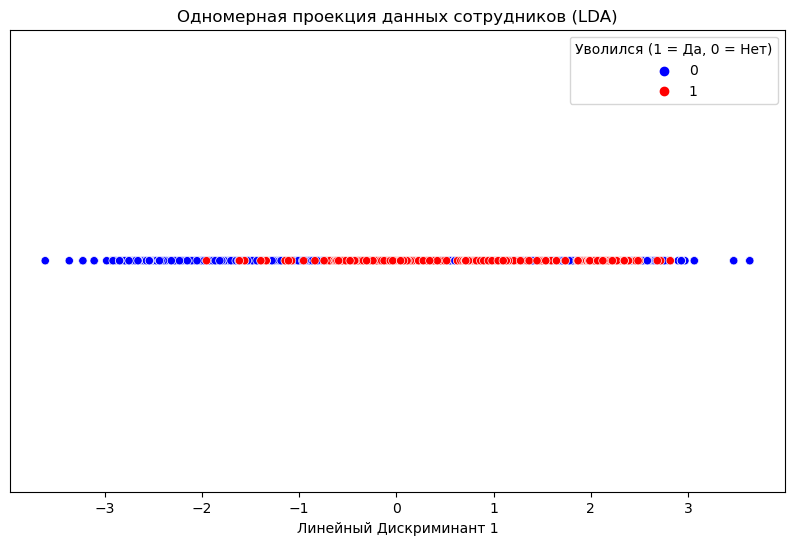

Точность модели LDA =  0.75


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Разделение данных на признаки (X) и целевую переменную (y)
X = quantitative_vars.drop('left', axis=1)
y = quantitative_vars['left']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Предсказывание на тестовой выборке, оценка точности
y_pred = lda.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Визуализация LDA
lda_vis = LinearDiscriminantAnalysis(n_components=1)
X_lda_1d = lda_vis.fit_transform(X, y)
lda_1d_df = pd.DataFrame(X_lda_1d, columns=['LD1'])
lda_1d_df['left'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=lda_1d_df, x='LD1', y=[0]*len(lda_1d_df), hue='left', palette={0: 'blue', 1: 'red'})
plt.title('Одномерная проекция данных сотрудников (LDA)')
plt.xlabel('Линейный Дискриминант 1')
plt.yticks([])
plt.legend(title='Уволился (1 = Да, 0 = Нет)', loc='best')
plt.show()

# Вывод точности модели
print(f'Точность модели LDA = ', round(accuracy,2))

Модель LDA показывает умеренную способность различать сотрудников, уволившихся и не уволившихся, на основе доступных факторов.
Визуализация подтверждает, что есть некоторое перекрытие между классами, что указывает на сложность задачи и возможность наличия других важных факторов, не учтенных в модели.
Точность модели составляет около 75.33%, что делает её потенциально полезной в определённых сценариях, но указывает на необходимость дальнейшего улучшения или комбинирования с другими методами.


